### The Statlog Shuttle dataset contains nine attributes all of which are numerical. The first one being time. The last column is refered to the class which contains seven categories.

In [2]:
# useful importations

import numpy as np

# We will be using sklearn preprocessing library as it will be easier to standardize the data
from sklearn import preprocessing

import pandas as pd 

# For zscore
from scipy import stats 

import matplotlib.pyplot as plt
import seaborn as sns

# For scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

import time
from timeit import default_timer as timer
from imblearn.over_sampling import RandomOverSampler, SMOTE

from scipy.stats import expon 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Data extraction

In [0]:
data_train = pd.read_csv("shuttle.trn", delimiter=' ', header=None)
data_test = pd.read_csv("shuttle.tst", delimiter=' ', header=None)


 ## Exploratory data analysis


In [0]:
# To read the data
data_train.head(4)

,0,1,2,3,4,5,6,7,8,9
0,50,21,77,0,28,0,27,48,22,2
1,55,0,92,0,0,26,36,92,56,4
2,53,0,82,0,52,-5,29,30,2,1
3,37,0,76,0,28,18,40,48,8,1


In [0]:
# Let's rename the columns in training and test set

cols = {}
columns = [(c, 'variable' +str(c)) for c in data_train.columns]
for c, variable in columns:
    cols[c] = variable
data_train = data_train.rename(columns=cols)
data_train = data_train.rename(columns={'variable9' : 'target'})

#for the test
cols = {}
columns = [(c, 'variable' +str(c)) for c in data_test.columns]
for c, variable in columns:
    cols[c] = variable
data_test = data_test.rename(columns=cols)
data_test= data_test.rename(columns={'variable9' : 'target'})

# Head visualization of the test set
data_test.head()

,variable0,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,target
0,55,0,81,0,-6,11,25,88,64,4
1,56,0,96,0,52,-4,40,44,4,4
2,50,-1,89,-7,50,0,39,40,2,1
3,53,9,79,0,42,-2,25,37,12,4
4,55,2,82,0,54,-6,26,28,2,1


In [0]:
# Basics summarize statistics in training set

data_train.describe()


,variable0,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,target
count,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000
mean,48.249747,-0.205126,85.341563,0.262736,34.528782,1.298276,37.074552,50.899862,13.964598,1.700529
std,12.252618,78.142770,8.908602,41.004131,21.703409,179.486760,13.135557,21.463250,25.648404,1.354648
min,27.000000,-4821.000000,21.000000,-3939.000000,-188.000000,-13839.000000,-48.000000,-353.000000,-356.000000,1.000000
25%,38.000000,0.000000,79.000000,0.000000,26.000000,-5.000000,31.000000,37.000000,0.000000,1.000000
50%,45.000000,0.000000,83.000000,0.000000,42.000000,0.000000,39.000000,44.000000,2.000000,1.000000
75%,55.000000,0.000000,89.000000,0.000000,46.000000,5.000000,42.000000,60.000000,14.000000,1.000000
max,126.000000,5075.000000,149.000000,3830.000000,436.000000,13148.000000,105.000000,270.000000,266.000000,7.000000


In [0]:
# Proportion over class
count = data_train['target'].value_counts()
prop = count / sum(count)
prop

1    0.784092
4    0.155126
5    0.056506
3    0.003034
2    0.000851
7    0.000253
6    0.000138
Name: target, dtype: float64

## Target distribution

In [0]:
# Statistics of target attribute

data_train['target'].value_counts()

1    34108
4     6748
5     2458
3      132
2       37
7       11
6        6
Name: target, dtype: int64

In [0]:
# To check for missing values in training data
data_train.isnull().values.any()

False

In [0]:
# To check for missing values in the test data
data_test.isnull().values.any()

False

### There is no missing values neither in training data nor in the test data

## Let's plot the histogram for a better understanding

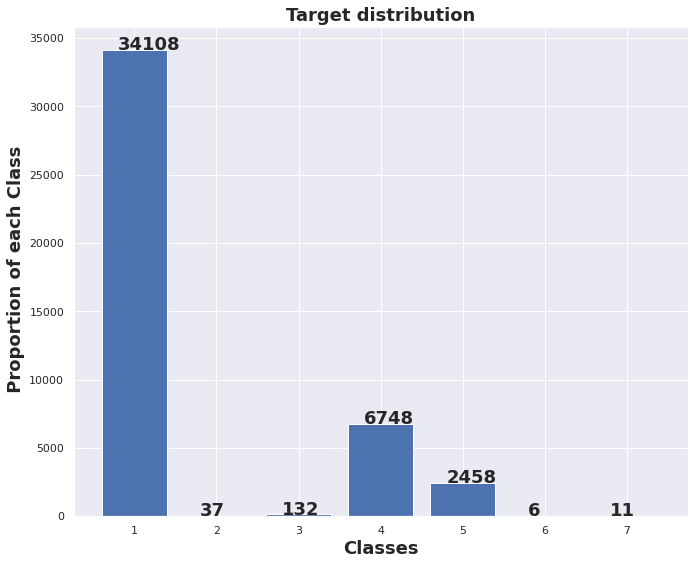

In [0]:
# class repartition in training data

plt.rcParams['figure.figsize'] = [11, 9]
plt.rcParams.update({'font.size':20})
fontdict = {'fontsize':18,
           'weight': 'bold'}
palette = palette = ['green', 'orange', 'brown', 'blue', 'red', 'black', 'yellow']
sns.set()

distribution = data_train.iloc[:, -1].value_counts()

plt.bar(distribution.index, distribution)
plt.title('Target distribution', fontdict=fontdict)
plt.ylabel(' Proportion of each Class', fontdict=fontdict)
plt.xlabel('Classes', fontdict=fontdict)

# to plot values
for i in distribution.index:
    plt.text(i-0.2, distribution[i], distribution[i], fontdict=fontdict)

### As we can see, the classes 2, 3, 6 and 7 contain less than 1% of the data. The dataset is very imbalanced. So let's try some balance techniques.


## Preprocessing

## Imbalance data preprocessing
* Here we remove the classes that have small proportion of number in the dataset.

In [0]:
# for the training data

z = data_train.target
data_train_modified = data_train.drop(np.where(z == 6 )[0], axis=0)
data_train_modified = data_train_modified.drop(np.where(z == 7 )[0], axis=0)
data_train_modified = data_train_modified.drop(np.where(z == 2 )[0], axis=0)
data_train_modified = data_train_modified.drop(np.where(z == 3 )[0], axis=0)


data_train_modified['target'].value_counts()



1    34108
4     6748
5     2458
Name: target, dtype: int64

In [0]:
# preprocessing for the test data

z = data_test.target
data_test_modified = data_test.drop(np.where(z == 6 )[0], axis=0)
data_test_modified = data_test_modified.drop(np.where(z == 7 )[0], axis=0)
data_test_modified = data_test_modified.drop(np.where(z == 2 )[0], axis=0)
data_test_modified = data_test_modified.drop(np.where(z == 3 )[0], axis=0)


data_test_modified['target'].value_counts()


1    11478
4     2155
5      809
Name: target, dtype: int64

In [0]:
# Extraction of features and target from the training dataset

x_train, y_train = data_train_modified.iloc[:,:-1], data_train_modified.iloc[:, -1]

In [0]:
# Extraction of features and target from the test dataset


x_test, y_test = data_test_modified.iloc[:,:-1], data_test_modified.iloc[:, -1]

## Scatter plot visualization 
* Since the variable0 is refered as being the time, let's plot the scatter plot of each variable with respect to variable0.

(-20.0, 20.0)

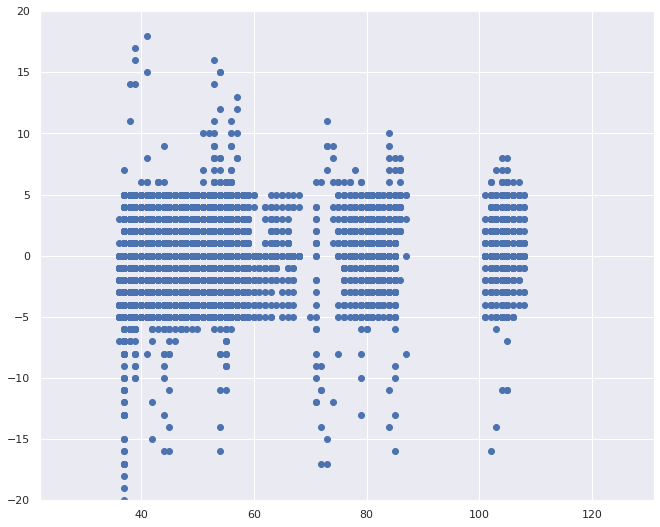

In [0]:
# Let's start with variable1

plt.scatter(data_train_modified['variable0'], data_train_modified['variable1'])
plt.ylim(-20, 20)

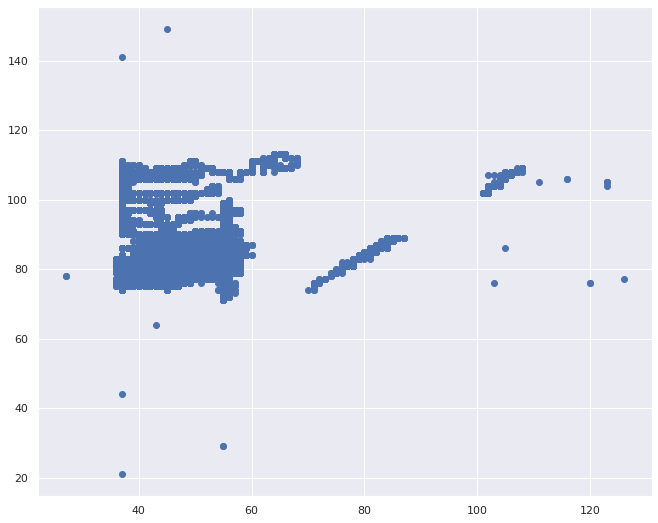

In [0]:
# Let's follow with the variable2

plt.scatter(data_train_modified['variable0'], data_train_modified['variable2'])
#plt.ylim(-20, 20)

(-20.0, 20.0)

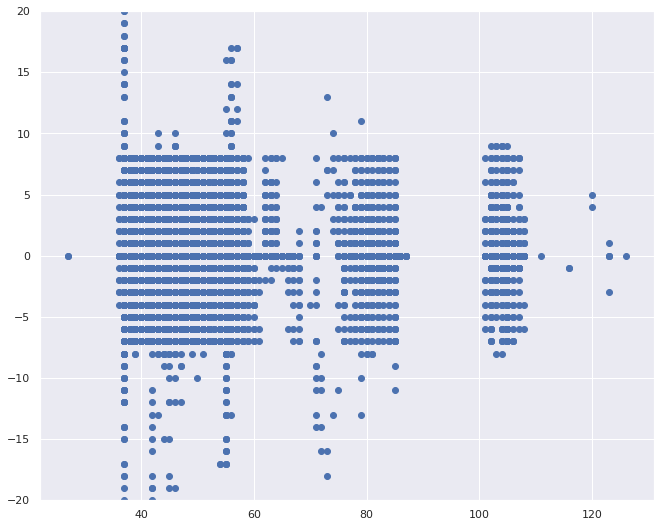

In [0]:
# Same for the variable3

plt.scatter(data_train_modified['variable0'], data_train_modified['variable3'])
plt.ylim(-20, 20)

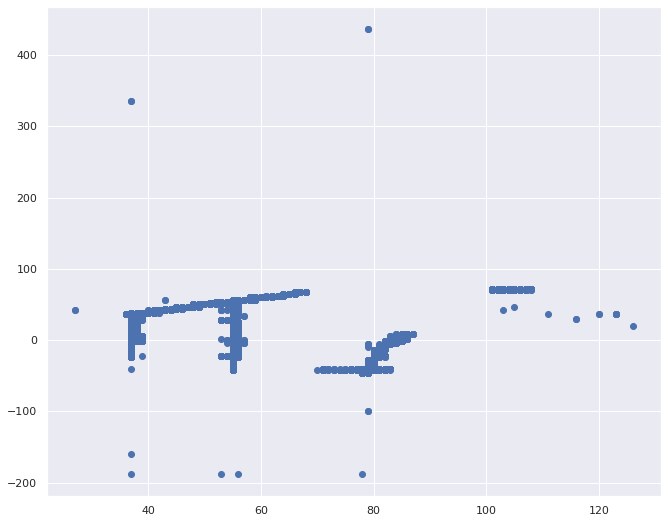

In [0]:
# For the variable4

plt.scatter(data_train_modified['variable0'], data_train_modified['variable4'])
#plt.ylim(-20, 20)

(-40.0, 40.0)

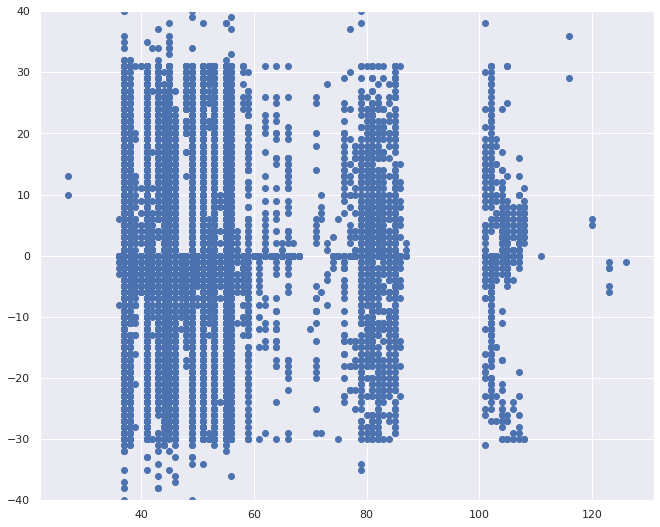

In [0]:
# The same for variable5

plt.scatter(data_train_modified['variable0'], data_train_modified['variable5'])
plt.ylim(-40, 40)

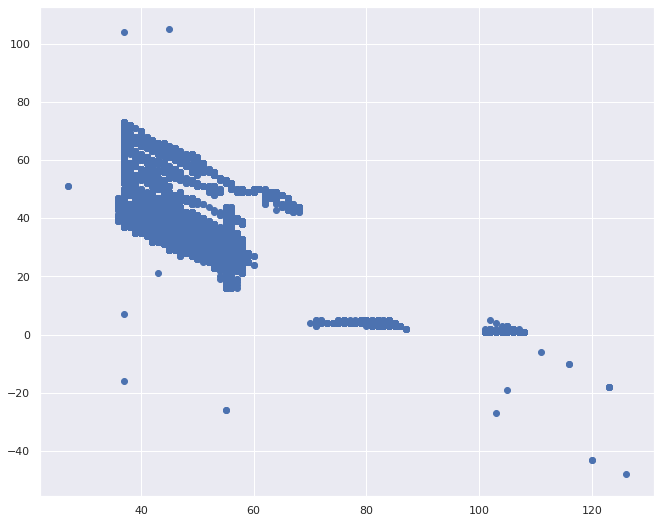

In [0]:
# Same for variable6

plt.scatter(data_train_modified['variable0'], data_train_modified['variable6'])
#plt.ylim(-20, 20)

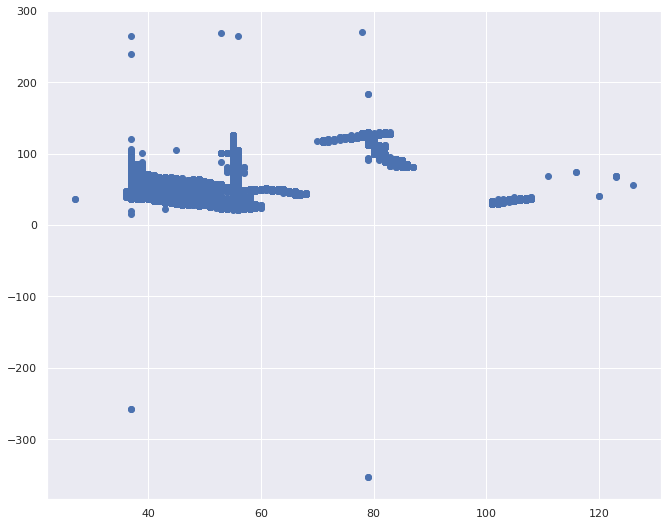

In [0]:
# same for variable7

plt.scatter(data_train_modified['variable0'], data_train_modified['variable7'])
#plt.ylim(-20, 20)

## outliers
* Based on the scatter plot, we can see that there is a lot of outliers. Let's remove them from the dataset.

## for training data

In [0]:
# To remove outliers in variable3

z = np.abs(stats.zscore(data_train_modified[['variable3']]))
threshold3 = 8 # this value is choosed based on the scatter plot

data_train_modified = data_train_modified.drop(np.where(z > threshold3)[0], axis=0)
data_train_modified = data_train_modified.drop(np.where(z < -threshold3)[0], axis=0)

In [0]:
# To remove outliers in variable1


z = np.abs(stats.zscore(data_train_modified[['variable1']]))
threshold1 = 3 # this value is choosed based on the scatter plot

data_train_modified = data_train_modified.drop(np.where(z > threshold1)[0], axis=0)
data_train_modified = data_train_modified.drop(np.where(z < -threshold1)[0], axis=0)

In [0]:
# To remove outliers in variable4


z = np.abs(stats.zscore(data_train_modified[['variable4']]))
threshold4 = 100 # this value is choosed based on the scatter plot

data_train_modified = data_train_modified.drop(np.where(z > threshold4)[0], axis=0)
data_train_modified = data_train_modified.drop(np.where(z < -threshold4)[0], axis=0)

In [0]:
# To remove outliers in variable5


z = np.abs(stats.zscore(data_train_modified[['variable5']]))
threshold5 = 30 # this value is choosed based on the scatter plot

data_train_modified = data_train_modified.drop(np.where(z > threshold5)[0], axis=0)
data_train_modified = data_train_modified.drop(np.where(z < -threshold5)[0], axis=0)

In [0]:
# To remove outliers in variable7


z = np.abs(stats.zscore(data_train_modified[['variable7']]))
threshold7 = 200 # this value is choosed based on the scatter plot

data_train_modified = data_train_modified.drop(np.where(z > threshold7)[0], axis=0)
data_train_modified = data_train_modified.drop(np.where(z < -threshold7)[0], axis=0)

## Let's also remove outliers in the test set

In [0]:
# To remove outliers in variable3


z = np.abs(stats.zscore(data_test_modified[['variable3']]))
threshold3 = 8 # this value is choosed based on the scatter plot

data_test_modified = data_test_modified.drop(np.where(z > threshold3)[0], axis=0)
data_test_modified = data_test_modified.drop(np.where(z < -threshold3)[0], axis=0)

In [0]:
# To remove outliers in variable1


z = np.abs(stats.zscore(data_test_modified[['variable1']]))
threshold1 = 3 # this value is choosed based on the scatter plot

data_test_modified = data_test_modified.drop(np.where(z > threshold1)[0], axis=0)
data_test_modified = data_test_modified.drop(np.where(z < -threshold1)[0], axis=0)

In [0]:
# To remove outliers in variable4


z = np.abs(stats.zscore(data_test_modified[['variable4']]))
threshold4 = 100 # this value is choosed based on the scatter plot

data_test_modified = data_test_modified.drop(np.where(z > threshold4)[0], axis=0)
data_test_modified = data_test_modified.drop(np.where(z < -threshold4)[0], axis=0)

In [0]:
# To remove outliers in variable5


z = np.abs(stats.zscore(data_test_modified[['variable5']]))
threshold5 = 30 # this value is choosed based on the scatter plot

data_test_modified = data_test_modified.drop(np.where(z > threshold5)[0], axis=0)
data_test_modified = data_test_modified.drop(np.where(z < -threshold5)[0], axis=0)

In [0]:
# To remove outliers in variable7


z = np.abs(stats.zscore(data_test_modified[['variable7']]))
threshold7 = 200 # this value is choosed based on the scatter plot

data_test_modified = data_test_modified.drop(np.where(z > threshold7)[0], axis=0)
data_test_modified = data_test_modified.drop(np.where(z < -threshold7)[0], axis=0)

## To extract the features and target from the modified training and test dataset

In [0]:
x_train, y_train = data_train_modified.iloc[:,:-1], data_train_modified.iloc[:, -1]
x_test, y_test = data_test_modified.iloc[:,:-1], data_test_modified.iloc[:, -1]


# To check for the shape
x_train.shape, x_test.shape

((43253, 9), (14420, 9))

## Let's standardize the data

In [0]:
# convert x_train and x_test to float
x_train = x_train.values.astype('float')
x_test = x_test.values.astype('float')

## Resampling techniques
* We are performing the random over-sampling method for the minority classes by picking samples at random with replacement.

In [0]:
# Oversampling method

ros = RandomOverSampler(random_state=42)
x_train, y_train = ros.fit_resample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
# Data standardization

rb_scaler = StandardScaler()
x_train_std = rb_scaler.fit_transform(x_train)
x_test = rb_scaler.transform(x_test)

In [0]:
# To visualize the dimensions of training and test sets

print("\n The dimensions of training and test sets are the following:")
print("X_train = {0}, y_train = {1}, X_test = {2} and y_test = {3}\n\n".format(x_train_std.shape, y_train.shape, x_test.shape, y_test.shape))



 The dimensions of training and test sets are the following:
X_train = (102168, 9), y_train = (102168,), X_test = (14420, 9) and y_test = (14420,)




## To build the three classifiers
* We will start with the Logistic Regression (LR), then The K neirest neighboors (KNN) and finally we will build the Support Vector Machine classifier (SVM).

In [0]:
test_time = list()
train_time = list()
accuracy = list()

## Logistic regression 

In [0]:
# Let's build the logistic regression model

lr_clf = LogisticRegression(C=10, random_state=0)
lr_clf

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:

start = timer()

lr_clf.fit(x_train_std, y_train )
end = timer()
lr_train_time = end - start
train_time.append(lr_train_time)
print(f'\n The training time for LR is {round(lr_train_time,3)} \n')


 The training time for LR is 5.432 seconds



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
# Let's do the prediction of the Logistic regression model

start = timer()

y_pred = lr_clf.predict(x_test)
end = timer()
lr_test_time = end - start

test_time.append(lr_test_time)
print(f'\n The testing time for LR is {round(lr_test_time,3)} \n')


 The testing time for LR is 0.003 seconds



In [0]:
# Let's compute the accuracy for the Logistic Regression model

acc1 = accuracy_score(y_test, y_pred)
accuracy.append(acc1*100)

print(f'\n The accuracy for LR is {round(acc1 *100,3)}% \n')


 The accuracy for LR is 97.413% 



## KNN

### Elbow method
* The K nearest neighboor is an algorithm that requires to set a hyperparameter k, which is the number of nearest neigboors. In order to find the best k, let's use the elbow method.

In [0]:
error_rate = []
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_std,y_train)
    pred_i = knn.predict(x_test)
    acc = accuracy_score(y_test, pred_i)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Error Rate')

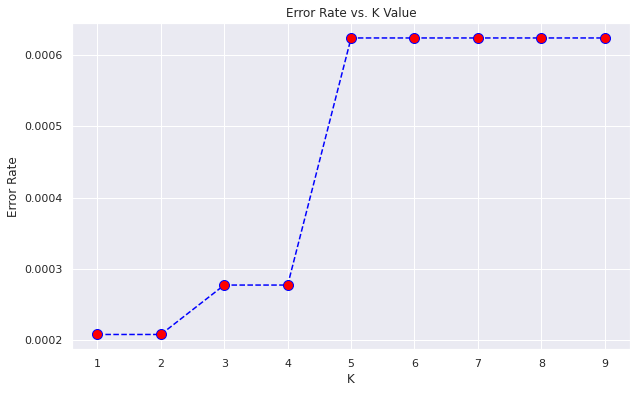

In [0]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### So the best value of k is 2 since at that level, the error is very small.

In [0]:
## Let's train the KNN model


neigh = KNeighborsClassifier(n_neighbors=2)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [0]:

start = timer()
neigh.fit(x_train_std, y_train)
end = timer()
knn_train_time = end - start

train_time.append(knn_train_time)
print(f'\n The training time for KNN is {round(knn_train_time,3)} \n')


 The training time for KNN is 6.07 seconds



In [0]:
## Let's do the prediction of the KNN model

start = timer()
y_pred2 = neigh.predict(x_test)
end = timer()
knn_test_time = end - start

test_time.append(knn_test_time)
print(f'\n The testing time for KNN is {round(knn_test_time,3)} \n')


 The testing time for KNN is 1.263 seconds



In [0]:
# Let's compute the accuracy of the KNN model

acc2 = accuracy_score(y_test, y_pred2)
accuracy.append(acc2*100)

print(f'\n The accuracy for KNN is {round(acc2*100, 3)}% \n')


 The accuracy for KNN is 99.979% 



## SVM

In [0]:
# Let's train  the SVM model

svm_clf = svm.SVC(C=2, kernel='rbf')
svm_clf

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:

start = timer()

svm_clf.fit(x_train_std, y_train)

end = timer()
svm_train_time = end - start

train_time.append(svm_train_time)
print(f'\n The training time for SVM is {round(svm_train_time ,3)} \n')


 The training time for SVM is 5.623 seconds



In [0]:


# Let's do the prediction of the SVM model

start = timer()

y_pred3 = svm_clf.predict(x_test)
end = timer()
svm_test_time = end - start

test_time.append(svm_test_time)
print(f'\n The testing time for SVM is {round(svm_test_time ,3)} \n')


 The testing time for SVM is 0.594 seconds



In [0]:


# Let's compute the accuracy of the SVM model

acc3 = accuracy_score(y_test, y_pred3)
accuracy.append(acc3*100)

print(f'\n The accuracy for SVM is {round(acc3 *100,3)}% \n')


 The accuracy for SVM is 99.979% 



## Comparisons of the three models in terms of accuracy, training and testing time

In [0]:
# Let's build a dataframe for a good visualization

dic = {'Accuracy':accuracy, 'Training time':train_time, 'Testing time':test_time}
summary = pd.DataFrame(dic, index=['LR', 'KNN', 'SVM'])
summary

,Accuracy,Training time,Testing time
LR,97.413315,5.431712,0.003386
KNN,99.979196,6.069823,1.262725
SVM,99.979196,5.623372,0.594165


## Simulated dataset

In [9]:
from collections import defaultdict
lamb1 = [4,6,12, .2]
lamb2 = [12,2, .1, 1]
cle = 0
general_dict = defaultdict(lambda:defaultdict(lambda:0))

for l1,l2 in zip(lamb1, lamb2):
    dict1  = dict()
    print('\n\n*****************************************************\n')
    print(f'Lambda1 is {l1} and lambda 2 is {l2}')
    print('\n****************************************************\n\n')
    # target generation

    weight1 = [.80, .01, .11, .04, .02, .01, .01]
    weight = [.70, .01, .20, .01, .05, .02, .01]
    target_m = []
    for i, j in enumerate(weight1):
      target_m.append([i] * int(j * 43000))

    target_m = np.concatenate(target_m, axis=0)

    #shuffle the data
    np.random.shuffle(target_m)

    target_mt = []
    for i, j in enumerate(weight1):
      target_mt.append([i] * int(j * 14000))

    target_mt = np.concatenate(target_mt, axis=0)

    #shuffle the data
    np.random.shuffle(target_mt)
    print(target_m.shape)

    # Generate simulated training and test data
    # feature generation
    import scipy as sp
    #np.random.seed(42)


    dataframe_train = pd.DataFrame()
    dataframe_test = pd.DataFrame()

    for i in range(9):

      dataframe_train['Variable'+str(i)]= sp.stats.expon.rvs(scale=1/l1, loc=0, size=43000) + np.random.normal(0, 100, 43000)

      dataframe_test['Variable'+str(i)] = sp.stats.expon.rvs(scale=1/l2, loc=0, size=14000) + np.random.normal(0, 100, 14000)



    # build the data
    dataframe_train['target'] = target_m
    dataframe_test['target'] = target_mt
    dataframe_train.head()

    # for the training data

    z = dataframe_train.target
    dataframe_train_modified = dataframe_train.drop(np.where(z == 1 )[0], axis=0)
    dataframe_train_modified = dataframe_train_modified.drop(np.where(z == 4 )[0], axis=0)
    dataframe_train_modified = dataframe_train_modified.drop(np.where(z == 5 )[0], axis=0)
    dataframe_train_modified = dataframe_train_modified.drop(np.where(z == 6 )[0], axis=0)

    ## for test

    z = dataframe_test.target
    dataframe_test_modified = dataframe_test.drop(np.where(z == 1 )[0], axis=0)
    dataframe_test_modified = dataframe_test_modified.drop(np.where(z == 4 )[0], axis=0)
    dataframe_test_modified = dataframe_test_modified.drop(np.where(z == 5 )[0], axis=0)
    dataframe_test_modified = dataframe_test_modified.drop(np.where(z == 6 )[0], axis=0)

    # training and target set

    dataframe_train, target_m = dataframe_train_modified.iloc[:,:-1], dataframe_train_modified.iloc[:, -1]
    dataframe_test, target_mt = dataframe_test_modified.iloc[:,:-1], dataframe_test_modified.iloc[:, -1]

    # convert x_train to float
    dataframe_train = dataframe_train.values.astype('float')
    dataframe_test = dataframe_test.values.astype('float')

    # to scale
    rb_scaler = StandardScaler()
    dataframe_train_ = rb_scaler.fit_transform(dataframe_train)
    dataframe_test_ = rb_scaler.transform(dataframe_test)



    ## time and accuracy

    train_time = list()
    test_time = list()
    accuracy = list()

    # Let's build the logistic regression model

    start = timer()

    lr_clf = LogisticRegression(C=10, random_state=0)
    lr_clf.fit(dataframe_train_, target_m )
    end = timer()
    lr_train_time = end - start
    train_time.append(lr_train_time)
    print(f'\n The training time for LR with simulated data is {round(lr_train_time,3)} \n')


    # Let's do the prediction of the Logistic regression model

    start = timer()

    y_pred = lr_clf.predict(dataframe_test_)
    end = timer()
    lr_test_time = end - start

    test_time.append(lr_test_time)
    print(f'\n The testing time for LR is {round(lr_test_time,3)} \n')

    # Let's compute the accuracy for the Logistic Regression model

    acc1 = accuracy_score(target_mt, y_pred)
    accuracy.append(acc1*100)

    print(f'\n The accuracy for LR is {round(acc1 *100,3)}% \n')

    ########### KNN

    # Let's compute the accuracy of the KNN model
    ## Let's do the prediction of the KNN model
    ## Let's train the KNN model

    start = timer()
    neigh = KNeighborsClassifier(n_neighbors=7)
    neigh.fit(dataframe_train_, target_m)
    end = timer()
    knn_train_time = end - start

    train_time.append(knn_train_time)
    print(f'\n The training time for KNN is {round(knn_train_time,3)} \n')


    start = timer()
    y_pred2 = neigh.predict(dataframe_test_)
    end = timer()
    knn_test_time = end - start

    test_time.append(knn_test_time)
    print(f'\n The testing time for KNN is {round(knn_test_time,3)} \n')

    acc2 = accuracy_score(target_mt, y_pred2)
    accuracy.append(acc2*100)

    print(f'\n The accuracy for KNN is {round(acc2*100, 3)}% \n')

    #####SVM


    # Let's train  the SVM model

    start = timer()

    svm_clf = svm.SVC(C=2, kernel='rbf')
    svm_clf.fit(dataframe_train_, target_m)

    end = timer()
    svm_train_time = end - start

    train_time.append(svm_train_time)
    print(f'\n The training time for SVM is {round(svm_train_time ,3)} \n')

    # # Let's do the prediction of the SVM model

    start = timer()

    y_pred3 = svm_clf.predict(dataframe_test_)
    end = timer()
    svm_test_time = end - start

    test_time.append(svm_test_time)
    print(f'\n The testing time for SVM is {round(svm_test_time ,3)} \n')


    # # Let's compute the accuracy of the SVM model

    acc3 = accuracy_score(target_mt, y_pred3)
    accuracy.append(acc3*100)

    print(f'\n The accuracy for SVM is {round(acc3 *100,3)}% \n')


    general_dict[cle]['Testing time'] = test_time
    general_dict[cle]['Training time'] = train_time
    general_dict[cle]['Accuracy'] = accuracy

    cle += 1



*****************************************************

Lambda1 is 4 and lambda 2 is 12

****************************************************


(43000,)

 The training time for LR with simulated data is 0.228 


 The testing time for LR is 0.001 


 The accuracy for LR is 84.211% 


 The training time for KNN is 0.085 


 The testing time for KNN is 3.206 


 The accuracy for KNN is 83.737% 


 The training time for SVM is 506.486 


 The testing time for SVM is 7.69 


 The accuracy for SVM is 84.211% 



*****************************************************

Lambda1 is 6 and lambda 2 is 2

****************************************************


(43000,)

 The training time for LR with simulated data is 0.224 


 The testing time for LR is 0.001 


 The accuracy for LR is 84.211% 


 The training time for KNN is 0.075 


 The testing time for KNN is 3.053 


 The accuracy for KNN is 83.805% 


 The training time for SVM is 530.921 


 The testing time for SVM is 7.86 


 The accuracy 

## Comparison of the three models on simulated dataset

In [10]:
# Let's build a dataframe for a better visualization 
print(f'lambda0 is: {lamb1[0]} and lambda1 is {lamb2[0]}\n\n')

pd.DataFrame(general_dict[0], index = ['LR', 'KNN', 'SVM'])

lambda0 is: 4 and lambda1 is 12




,Testing time,Training time,Accuracy
LR,0.001237,0.228129,84.210526
KNN,3.205979,0.085435,83.736842
SVM,7.690269,506.486403,84.210526


In [11]:
# Dataframe of the three classifiers when lamda1=4 and lambda2=12
print(f'lambda0 is: {lamb1[1]} and lambda1 is {lamb2[1]}\n\n')
pd.DataFrame(general_dict[1], index = ['LR', 'KNN', 'SVM'])

lambda0 is: 6 and lambda1 is 2




,Testing time,Training time,Accuracy
LR,0.000963,0.223706,84.210526
KNN,3.052781,0.075124,83.804511
SVM,7.860101,530.920926,84.210526


In [12]:
print(f'lambda0 is: {lamb1[2]} and lambda1 is {lamb2[2]}\n\n')

pd.DataFrame(general_dict[2], index = ['LR', 'KNN', 'SVM'])

lambda0 is: 12 and lambda1 is 0.1




,Testing time,Training time,Accuracy
LR,0.000884,0.225039,84.210526
KNN,3.070037,0.081598,83.827068
SVM,7.847578,529.513173,84.210526


In [13]:
print(f'lambda0 is: {lamb1[3]} and lambda1 is {lamb2[3]}\n\n')

pd.DataFrame(general_dict[3], index = ['LR', 'KNN', 'SVM'])

lambda0 is: 0.2 and lambda1 is 1




,Testing time,Training time,Accuracy
LR,0.000911,0.222003,84.210526
KNN,3.147899,0.077551,83.639098
SVM,8.021948,537.167184,84.210526
